## Imbalanced Classes

**Class imbalance** means when in the dataset samples of one class are much more than samples of other classes.
This is a very common case in many classification applications e.g Credit card fraud detection. 
Fraudulent transactions are generally much less in number than bonafide transaction. 
In such situations general classification metrics are not very useful, for example say there is 99% chance that a transaction is not fraudulent then having a predictor which predicts always not fraud will have 99% accuracy! 
There are few ways to handle class imbalance

1. **Under sampling of majority class**: In this method we only pick samples of majority class which are same in number as the samples of minority class. Disadvantage here is we drop a lot of data.

2. **Over sampling of minority class**: In this we oversample, basically sample with replacement the examples of the minority class to make both the classes of equal size. Here the disadvantage is we can overfit the minority class samples a lot.

3. **Another popular technique is SMOTE ( Synthetic Minority Oversampling Technique )**: In this technique new random minority class data points are generated such that they have similar characteristics like the original data. It’s a very popular technique and is widely used for imbalanced datasets.

In the notebook below we will try all the three methods to handle Imbalanced Classes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

In [2]:
#Create an imbalanced dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=1)

In [3]:
#Lets count the number of instances
print(f"class counts {np.bincount(y)}")

class counts [99900   100]


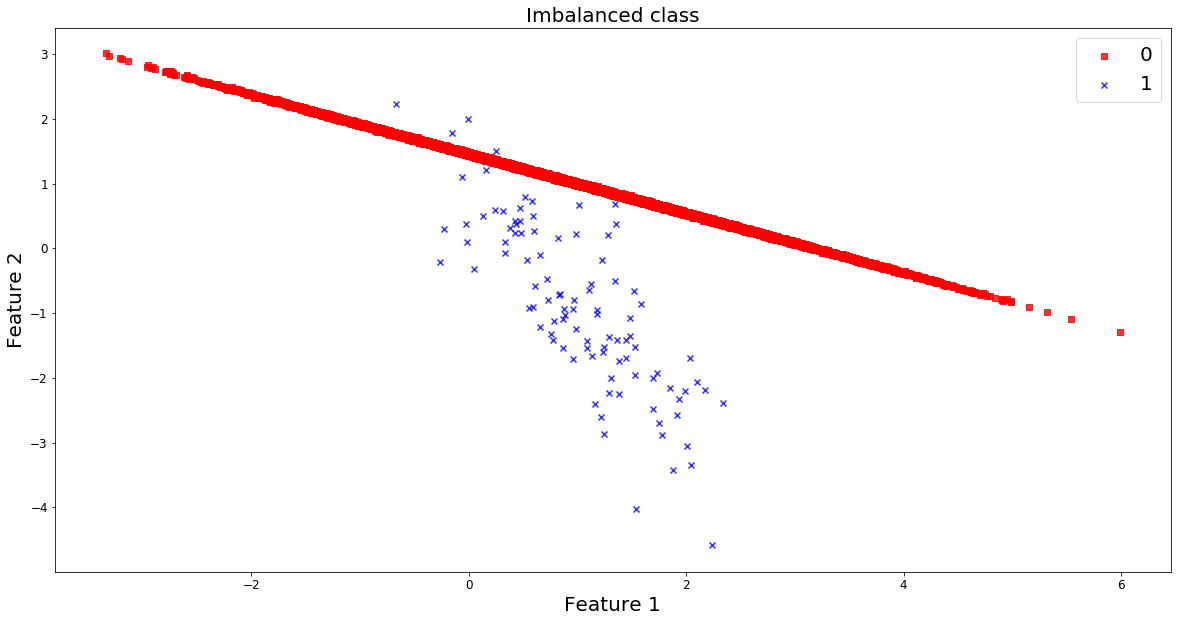

In [4]:
def plotData(X, y):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    plt.figure(figsize=(20,10))
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl)
    plt.xlabel('Feature 1', fontsize=20)
    plt.ylabel('Feature 2', fontsize=20)
    plt.legend(fontsize=20)
    plt.axis(fontsize=20)
    plt.title('Imbalanced class', fontsize=20)
plotData(X, y)

In [5]:
#lets apply Logistic regression on the class and see the results
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [6]:
#Pipeline with high level of regularization
pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X, y)
print(f"Accuracy = {pipe_lr.score(X, y)}")


Accuracy = 0.99983


Logistic regression has very high accuracy, but even an algorithm which would predict every class as class zero would have an accuracy of **0.999**.
Lets look at the **confusion matrix**.

Confusion Matrix = [[99900     0]
 [   17    83]]


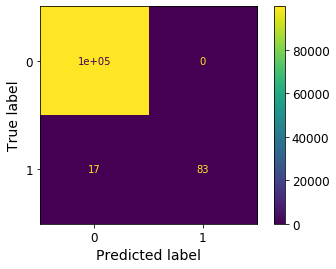

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_pred = pipe_lr.predict(X)

confusion_matrix_test = confusion_matrix(y, y_pred)
print("Confusion Matrix =", confusion_matrix_test)
plot_confusion_matrix(pipe_lr, X, y) 

From the confusion matrix we can see that 17 out of 100 labels of type 1 are classified as type 0.
That is not good performance. Lets calculate other metrics like **precision** and **recall**.


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f"Accuracy = {accuracy_score(y, y_pred):.5}")
print(f"Precision = {precision_score(y, y_pred):.5}")
print(f"Recall = {recall_score(y, y_pred):.5}")
print(f"F1 Score = {f1_score(y, y_pred):.5}")

Accuracy = 0.99983
Precision = 1.0
Recall = 0.83
F1 Score = 0.9071


We can see **precision** is 100% but the **recall** is only 83%. 

#### DownSampling.
Now lets apply downsampling on the dataset and see if we can improve recall.

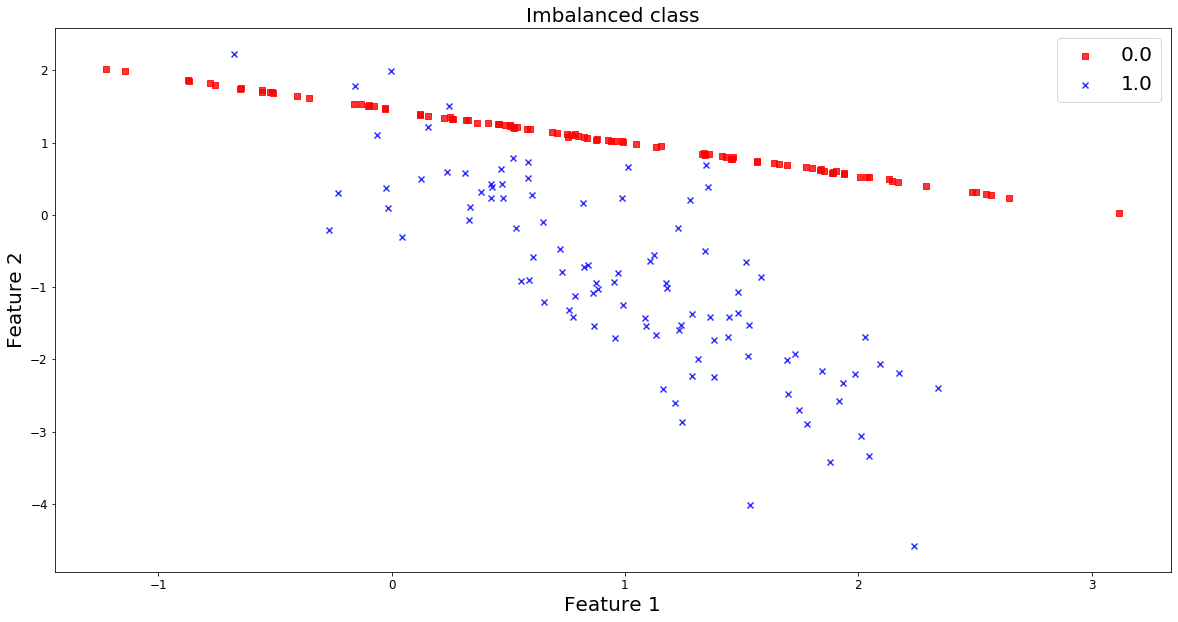

In [9]:
#randomly select 100 elements of class 0
from sklearn.utils import resample
X_down = X[y==0,:]
X_down = resample(X_down, replace=False, n_samples=100, random_state=1)

X_ds = np.vstack((X[y==1,:], X_down))
y_ds = np.hstack((np.ones(100), np.zeros(100)))
plotData(X_ds, y_ds)

Accuracy = 0.945
Confusion Matrix = [[99900     0]
 [   11    89]]
Accuracy = 0.99989
Precision = 1.0
Recall = 0.89
F1 Score = 0.9418


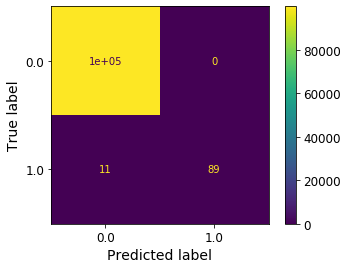

In [10]:
#Lets apply logistics regression on this dataset
pipe_lr.fit(X_ds, y_ds)
print(f"Accuracy = {pipe_lr.score(X_ds, y_ds)}")

y_ds_pred = pipe_lr.predict(X)

confusion_matrix_test = confusion_matrix(y, y_ds_pred)
print("Confusion Matrix =", confusion_matrix_test)
plot_confusion_matrix(pipe_lr, X, y) 

print(f"Accuracy = {accuracy_score(y, y_ds_pred):.5}")
print(f"Precision = {precision_score(y, y_ds_pred):.5}")
print(f"Recall = {recall_score(y, y_ds_pred):.5}")
print(f"F1 Score = {f1_score(y, y_ds_pred):.5}")

**Recall** has improved to 89% by downsampling.

#### Upsampling

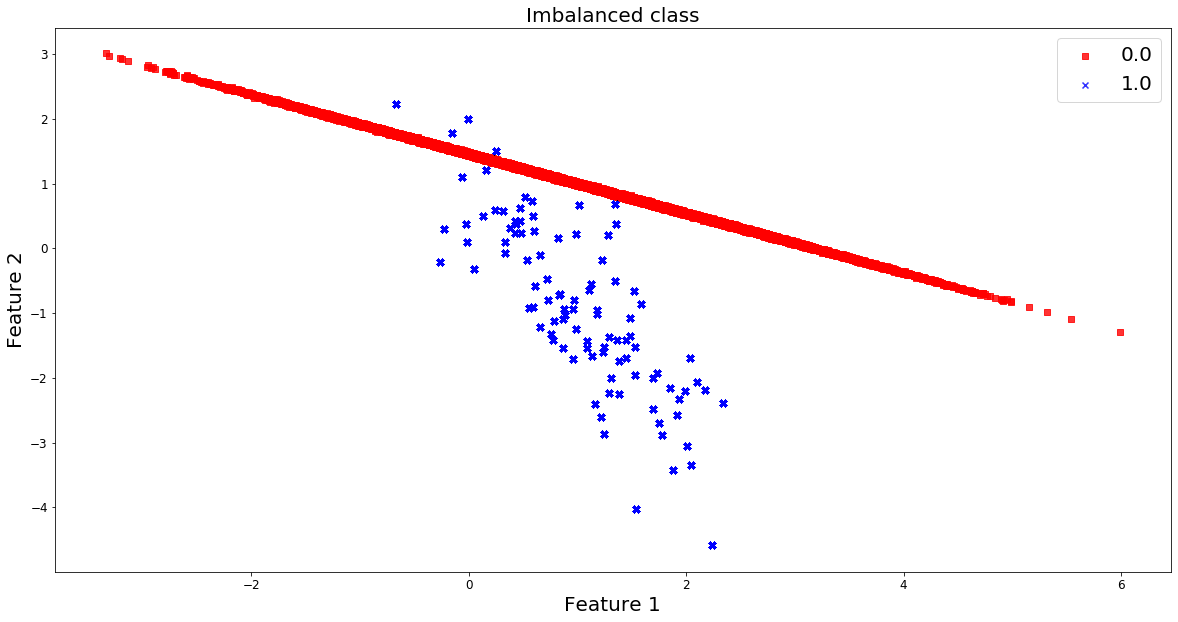

In [11]:
from sklearn.utils import resample
X_up = X[y==1,:]
X_up = resample(X_up, replace=True, n_samples=99900, random_state=1)

X_us = np.vstack((X[y==0,:], X_up))
y_us = np.hstack((np.zeros(99900), np.ones(99900)))
plotData(X_us, y_us)

Accuracy = 0.9653403403403403
Confusion Matrix = [[99877    23]
 [    7    93]]
Accuracy = 0.9997
Precision = 0.80172
Recall = 0.93
F1 Score = 0.86111


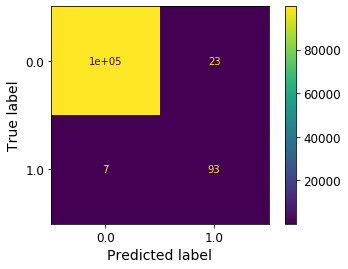

In [12]:
#Lets apply logistics regression on this dataset
pipe_lr.fit(X_us, y_us)
print(f"Accuracy = {pipe_lr.score(X_us, y_us)}")

y_us_pred = pipe_lr.predict(X)

confusion_matrix_test = confusion_matrix(y, y_us_pred)
print("Confusion Matrix =", confusion_matrix_test)
plot_confusion_matrix(pipe_lr, X, y) 

print(f"Accuracy = {accuracy_score(y, y_us_pred):.5}")
print(f"Precision = {precision_score(y, y_us_pred):.5}")
print(f"Recall = {recall_score(y, y_us_pred):.5}")
print(f"F1 Score = {f1_score(y, y_us_pred):.5}")

With **upsampling** recall has gone up but precision has taken a hit, Model is overfitting to the rare samples.

#### SMOTE

class counts [99900 99900]
Accuracy = 0.9717917917917918
Confusion Matrix = [[99889    11]
 [    7    93]]
Accuracy = 0.99982
Precision = 0.89423
Recall = 0.93
F1 Score = 0.91176


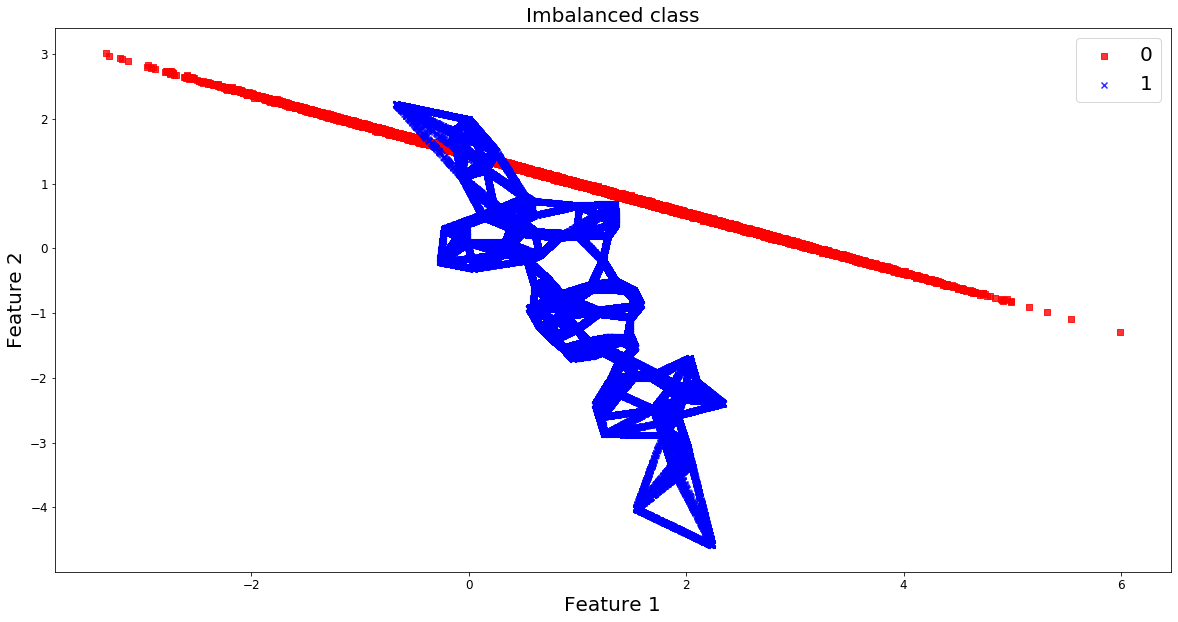

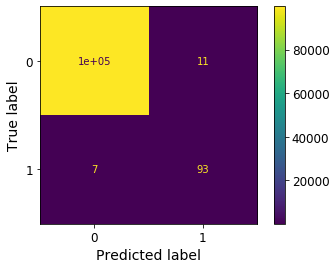

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

#Lets count the number of instances
print(f"class counts {np.bincount(y_smote)}")
plotData(X_smote, y_smote)

pipe_lr.fit(X_smote, y_smote)
print(f"Accuracy = {pipe_lr.score(X_smote, y_smote)}")

y_smote_pred = pipe_lr.predict(X)

confusion_matrix_test = confusion_matrix(y, y_smote_pred)
print("Confusion Matrix =", confusion_matrix_test)
plot_confusion_matrix(pipe_lr, X, y) 

print(f"Accuracy = {accuracy_score(y, y_smote_pred):.5}")
print(f"Precision = {precision_score(y, y_smote_pred):.5}")
print(f"Recall = {recall_score(y, y_smote_pred):.5}")
print(f"F1 Score = {f1_score(y, y_smote_pred):.5}")

With **SMOTE** Resampling precision has gone down to 89% and recall up to 93%.